### Sample program for manifold learning  

#### Import libraries  

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE
from sklearn.preprocessing import StandardScaler
from time import time

#### Parameters  

In [2]:
n_points = 1200
n_neighbors = 10
n_components = 2

#### Generate s_curve data

In [3]:
X_org, color = datasets.make_swiss_roll(n_points, random_state=0)
print(X_org.shape)
print(X_org[:3])
print(color.shape)
print(color[:3])

(1200, 3)
[[ -8.85708287   6.47908715  -4.38885338]
 [  5.0569229   19.7858791  -10.2760021 ]
 [ -5.88799247  18.65356585  -8.56459157]]
(1200,)
[ 9.8848344  11.45288996 10.39329996]


#### Standardization of data  

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X_org) 

#### Figures  

PCA ...
MDS ...
Isomap ...
LLE ...
t-SNE ...


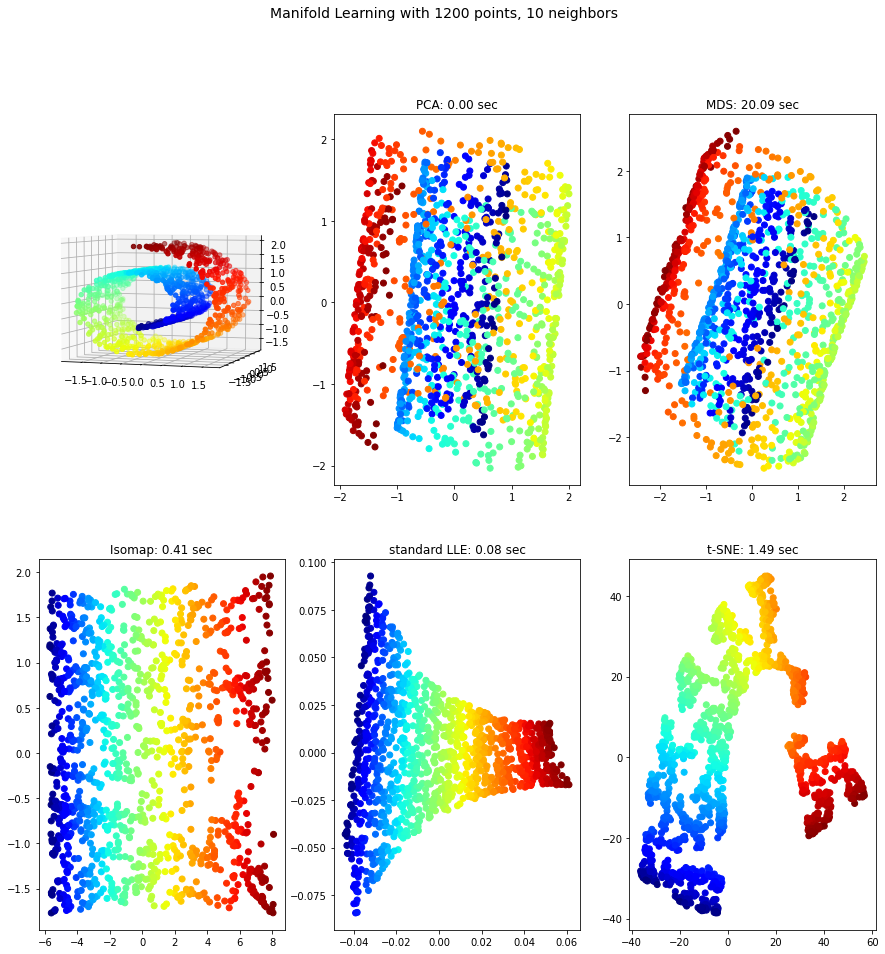

In [6]:
fig = plt.figure(figsize=(15, 15))
title = 'Manifold Learning'
title += ' with {} points,'.format(n_points)
title += ' {} neighbors'.format(n_neighbors)
plt.suptitle(title, fontsize=14)

# 3D s_curve
ax = fig.add_subplot(2,3,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4, -72)

# PCA
print('PCA ...')
t0 = time()
Y = PCA(n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("PCA: {:.2f} sec".format(t1-t0))

# MDS
print('MDS ...')
t0 = time()
Y = MDS(n_components=n_components, random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("MDS: {:.2f} sec".format(t1-t0))

# Isomap
print('Isomap ...')
t0 = time()
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,4)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("Isomap: {:.2f} sec".format(t1-t0))

# LLE
print('LLE ...')
t0 = time()
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,5)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("standard LLE: {:.2f} sec".format(t1-t0))

# t-SNE
print('t-SNE ...')
t0 = time()
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,6)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("t-SNE: {:.2f} sec".format(t1-t0))

plt.show()